In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import regex 
import re, nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')



In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# pip install google_trans_new
# import google_trans_new
# print(google_trans_new.LANGUAGES)

#nltk.download('rslp')
#stemmer = nltk.stem.RSLPStemmer()

In [75]:
from google_trans_new import google_translator
translator = google_translator()
translate_text = translator.translate('Excelente mochila, entrega super rápida. Super',lang_tgt='en',lang_src='pt' )
print(translate_text)

Excellent backpack, super fast delivery. Super 


In [12]:
review_data = pd.read_csv('olist_order_reviews_dataset.csv')
review_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
review_data.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [14]:
review_data_title = review_data['review_comment_title']
review_data = review_data.drop(['review_comment_title'],axis=1)


In [15]:
review_data  = review_data.dropna()
review_data_title = review_data_title.dropna()


In [24]:
review_data = review_data.reset_index(drop=True)
review_data.head(3)
review_data.shape

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


(41753, 6)

In [26]:
review_data_title = review_data_title.reset_index(drop=True)
review_data_title.head(3)
review_data_title.shape

0                  recomendo
1            Super recomendo
2    Não chegou meu produto 
Name: review_comment_title, dtype: object

(11715,)

In [27]:
stopwords.words('portuguese')

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [43]:
messages = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    
    messages.append(' '.join(filtered_result))

In [107]:
messages

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come ser usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedo

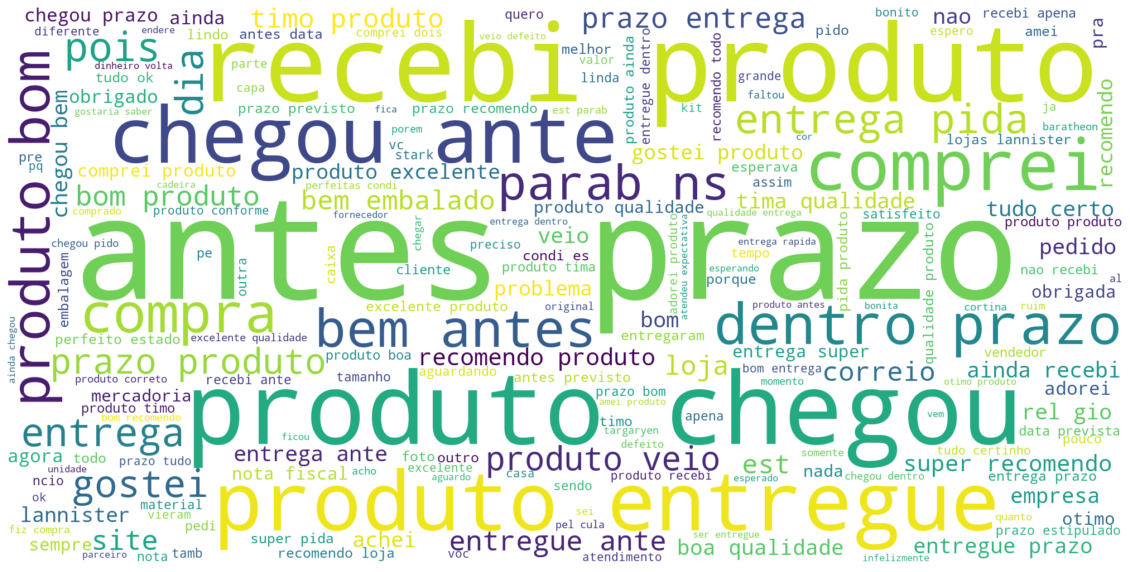

In [54]:
#Let's use worldcloud to visualize the messages
unique_string=(" ").join(messages)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [71]:

co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(messages)
important_unigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [72]:
important_unigrams = important_unigrams.reset_index()
important_unigrams.rename(columns={'index':'unigrams',0:'frequency'},inplace=True)
important_unigrams.head()

,unigrams,frequency
0,produto,18866
1,prazo,8543
2,entrega,6683
3,antes,5655
4,chegou,5643


In [78]:
important_unigrams['english_translation'] = important_unigrams['unigrams'].apply(translator.translate)
important_unigrams

,unigrams,frequency,english_translation
0,produto,18866,product
1,prazo,8543,deadline
2,entrega,6683,delivery
3,antes,5655,before
4,chegou,5643,has arrived
5,recebi,5464,I received
6,bom,4637,good
7,recomendo,4362,I recommend
8,entregue,3899,delivered
9,veio,3362,came


In [83]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(messages)
important_bigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [84]:
important_bigrams=important_bigrams.reset_index()
important_bigrams.rename(columns={'index':'bigrams',0:'frequency'},inplace=True)

important_bigrams['english_translation'] = important_bigrams['bigrams'].apply(translator.translate)
important_bigrams

,bigrams,frequency,english_translation
0,antes prazo,4207,before deadline
1,recebi produto,1942,I received product
2,produto chegou,1720,product arrived
3,produto entregue,1616,product delivered
4,chegou antes,1465,arrived before
5,dentro prazo,1092,within term
6,bem antes,973,well before
7,parab ns,950,parab ns
8,entrega pida,900,delivery ask
9,produto bom,883,good product


In [87]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(messages)
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [88]:
important_trigrams=important_trigrams.reset_index()
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True)

important_trigrams['english_translation'] = important_trigrams['trigrams'].apply(translator.translate)
important_trigrams

,trigrams,frequency,english_translation
0,chegou antes prazo,1112,arrived before deadline
1,bem antes prazo,708,well before term
2,entregue antes prazo,608,delivered before deadline
3,produto chegou antes,448,product arrived before
4,entrega antes prazo,433,delivery before deadline
5,chegou bem antes,417,arrived well before
6,produto entregue antes,374,product delivered before
7,entrega super pida,297,super delivery ask
8,antes prazo previsto,287,before expected deadline
9,ainda recebi produto,261,I still received product


In [ ]:
df['topic']=lda.transform(docs).argmax(axis=1)
df.topic.value_counts(normalize=True).plot.bar()

<Figure size 1008x432 with 0 Axes>

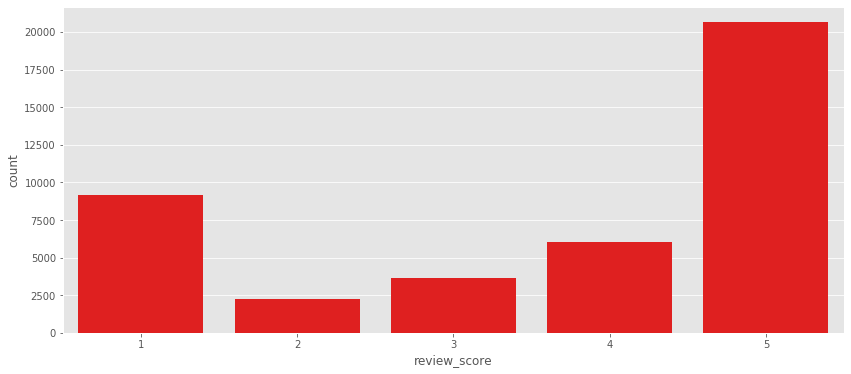

In [100]:
plt.figure(figsize = (14,6))
sns.countplot(review_data['review_score'], color= 'red')

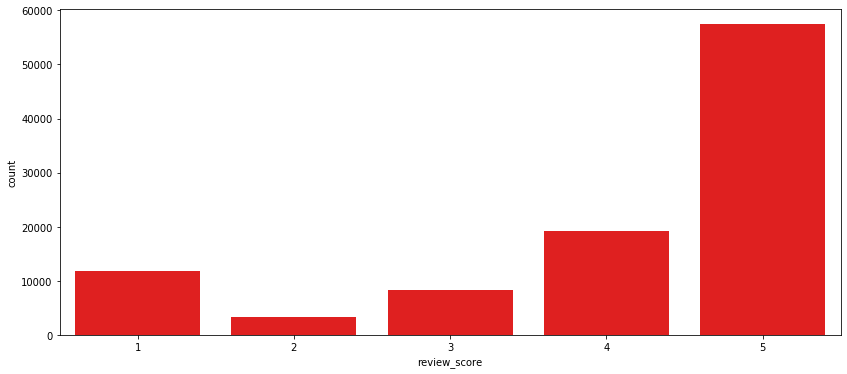

In [84]:
plt.figure(figsize = (14,6))
sns.countplot(df3['review_score'], color= 'red')

In [28]:
messages1 = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data_title:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    
    messages1.append(' '.join(filtered_result))

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

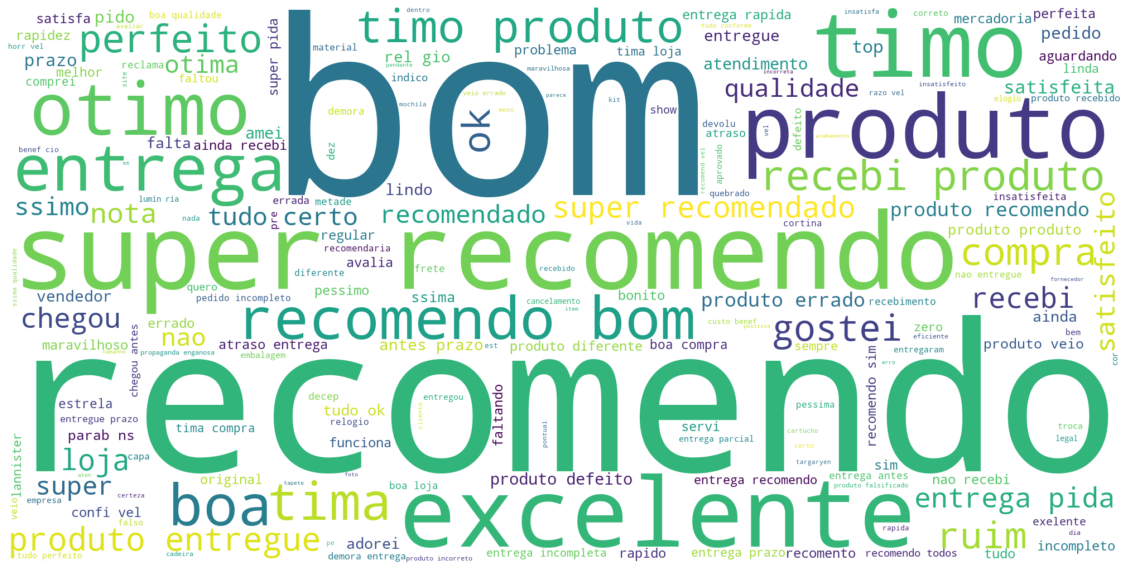

In [29]:
#Let's use worldcloud to visualize the messages
unique_string=(" ").join(messages1)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(messages1)
important_unigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [92]:
important_unigrams_title=important_unigrams_title.reset_index()
important_unigrams_title.rename(columns={'index':'unigrams_title',0:'frequency'},inplace=True)

important_unigrams_title['english_translation'] = important_unigrams_title['unigrams_title'].apply(translator.translate)
important_unigrams_title

,unigrams_title,frequency,english_translation
0,recomendo,2085,I recommend
1,produto,1327,product
2,bom,1321,good
3,super,901,super
4,timo,730,Timo
5,excelente,665,Excellent
6,entrega,544,delivery
7,otimo,369,great
8,recebi,302,I received
9,boa,273,good


In [98]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(messages1)
important_bigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [99]:
important_bigrams_title=important_bigrams_title.reset_index()
important_bigrams_title.rename(columns={'index':'bigrams_title',0:'frequency'},inplace=True)

important_bigrams_title['english_translation'] = important_bigrams_title['bigrams_title'].apply(translator.translate)
important_bigrams_title

,bigrams_title,frequency,english_translation
0,super recomendo,681,super recommend
1,recebi produto,131,I received product
2,timo produto,103,great product
3,super recomendado,103,super recommended
4,produto entregue,103,product delivered
5,entrega pida,92,delivery ask
6,bom produto,76,good product
7,tudo certo,76,all right
8,produto errado,74,wrong product
9,produto bom,66,good product


In [93]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(messages1)
important_trigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [94]:
important_trigrams_title=important_trigrams_title.reset_index()
important_trigrams_title.rename(columns={'index':'trigrams_title',0:'frequency'},inplace=True)

important_trigrams_title['english_translation'] = important_trigrams_title['trigrams_title'].apply(translator.translate)
important_trigrams_title

,trigrams_title,frequency,english_translation
0,entrega super pida,27,super delivery ask
1,entrega antes prazo,15,delivery before deadline
2,custo benef cio,12,cost benefit
3,chegou antes prazo,11,arrived before deadline
4,nao recebi produto,11,I did not recieve the product
5,produto boa qualidade,8,good quality product
6,produto entregue prazo,8,product delivered on time
7,produto veio errado,7,product came wrong
8,produto veio defeito,7,product came defect
9,produto nao entregue,7,product not delivered


Text(0.5, 0, 'Review Length (words)')

Text(0, 0.5, 'Frequency')

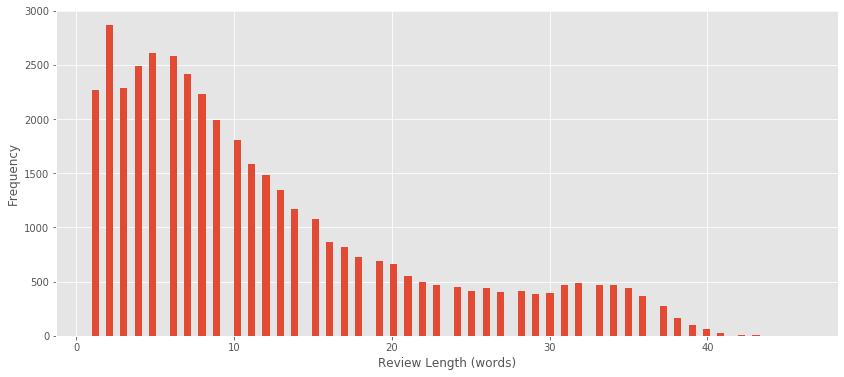

In [101]:
## Getting the number of words by splitting them by a space
words_per_review = review_data.review_comment_message.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [103]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())



Average words: 12.047804948147439
Skewness: 1.0577282382939468


In [105]:
percent_val = 100 * review_data['review_score'].value_counts()/len(review_data)
percent_val

5    49.447944
1    21.984049
4    14.451656
3     8.777812
2     5.338539
Name: review_score, dtype: float64

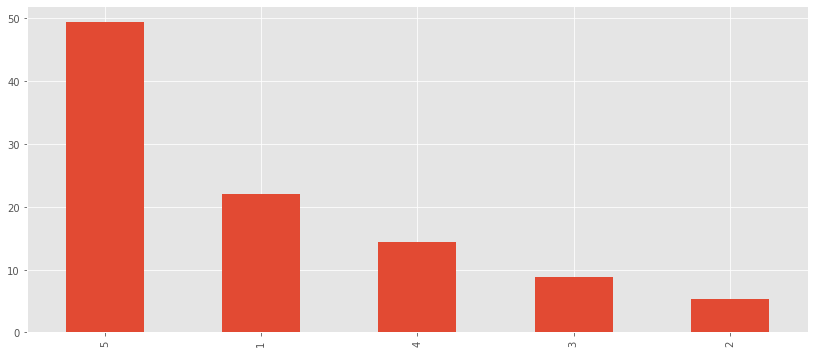

In [106]:
percent_val.plot.bar()
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer()
model = vectorizer.fit(df.review_comment_message)
docs = vectorizer.transform(df.review_comment_message)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([(feature_names[i])
    for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()
print_top_words(lda,vectorizer.get_feature_names(),10)

# SENTIMENT ANALYSIS

In [132]:
#Mapping the ratings
review_data['Sentiment_rating'] = np.where(review_data.review_score > 3,1,0)

## Removing neutral reviews 
review_data = review_data[review_data.review_score != 3]

# Printing the counts of each class
review_data['Sentiment_rating'].value_counts()

1    26680
0    11408
Name: Sentiment_rating, dtype: int64

In [137]:
review_data['Sentiment_rating'].shape

(38088,)

In [138]:
messages = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    
    messages.append(' '.join(filtered_result))

In [139]:
from nltk import word_tokenize
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(#tokenizer= word_tokenize, # type of tokenization
                             stop_words =set(stopwords.words('portuguese')) , # List of stopwords
                             ngram_range=(1,4)) # number of n-grams

bow_data = bow_counts.fit_transform(messages)

In [140]:
bow_data

<38088x422326 sparse matrix of type '<class 'numpy.int64'>'
	with 870129 stored elements in Compressed Sparse Row format>

In [141]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    review_data['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [142]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.70189
0    0.29811
Name: Sentiment_rating, dtype: float64

In [149]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

LogisticRegression(max_iter=200)

F1 score:  0.9455289087190927


In [150]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

a= pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[:15]) # top-15 more important features for positive reviews

In [151]:
a['english_translation'] = a['words'].apply(translator.translate)
a

,words,weights,english_translation
166120,excelente,3.339201,Excellent
389525,timo,3.029113,Timo
275765,pido,2.647324,I ask
358938,satisfeito,2.557698,pleased
17056,amei,2.542319,Amei
45931,bom,2.542146,good
5972,adorei,2.431442,I loved it
255753,otimo,2.429904,great
272397,perfeito,2.415016,Perfect
215217,lindo,2.385259,pretty


In [152]:
b = pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[-15:]) # top-15 more important features for negative reviews
b['english_translation'] = b['words'].apply(translator.translate)
b

,words,weights,english_translation
34507,atrasada,-1.623955,late
37545,baixa,-1.639924,low
336270,recebi,-1.685943,I received
146251,entregaram,-1.693190,delivered
274092,pessimo,-1.709599,bad
109952,demora,-1.737545,delay
153098,enviaram,-1.762583,sent
329667,quebrado,-1.779512,broke
264666,passou,-1.801205,passed on
107399,decepcionada,-1.823077,disappointed
